<a href="https://colab.research.google.com/github/vatturisrinivas/op_project/blob/main/Build_a_Convolution_Neural_Network_for_Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

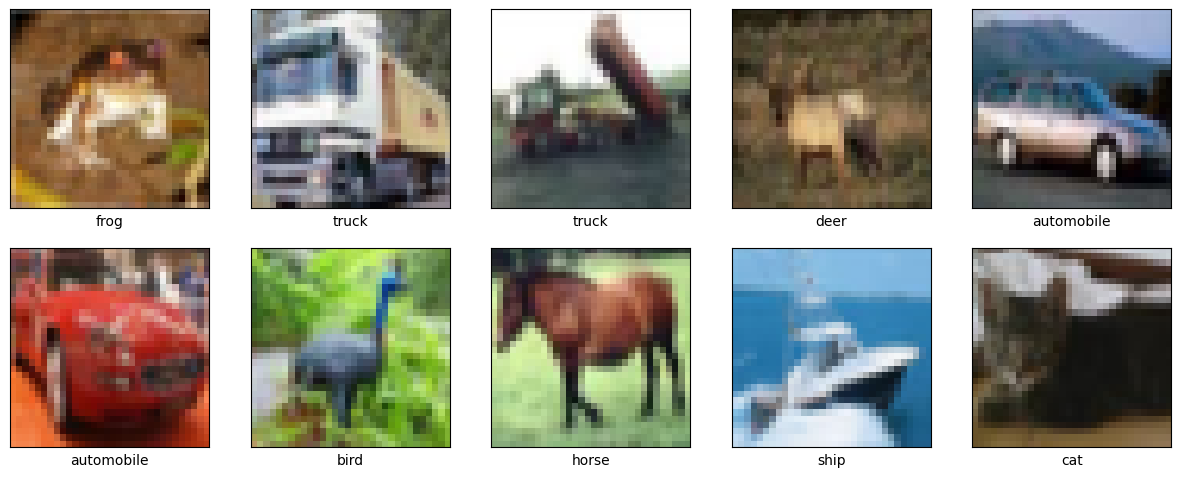

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 35ms/step - accuracy: 0.3762 - loss: 1.7109 - val_accuracy: 0.5619 - val_loss: 1.2370
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.5817 - loss: 1.1923 - val_accuracy: 0.6183 - val_loss: 1.0972
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.6323 - loss: 1.0520 - val_accuracy: 0.6450 - val_loss: 1.0249
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.6628 - loss: 0.9648 - val_accuracy: 0.6684 - val_loss: 0.9705
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.6808 - loss: 0.9218 - val_accuracy: 0.6704 - val_loss: 0.9439
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 35ms/step - accuracy: 0.6993 - loss: 0.8626 - val_accuracy: 0.6703 - val_loss: 0.9634
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 39ms/step - accuracy: 0.7152 - loss: 0.8182 - val_accuracy: 0.6861 - val_loss: 0.9167
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7303 -

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import tensorflow as tf

# Load and normalize CIFAR-10 data
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

class_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_name[y_train[i][0]])
plt.show()


# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate
print("Test Accuracy:", model.evaluate(x_test, y_test)[1])
